# Move multiple files into one folder

In [6]:
# Load required package
library(tools)

# Specify the source and destination directories
source_dir <- "C:/Users/truev/Documents/UCSC/BaysianStatistics/02_Techniques/Week5"
dest_dir <- "C:/Users/truev/Documents/UCSC/BaysianStatistics/02_Techniques/Week5/plots"

# Get a list of all .png files in the source directory
files <- list.files(path = source_dir, pattern = "\\.png|jpg$")

# Move each .png file to the destination directory
for (file in files) {
  file.rename(from = file.path(source_dir, file), 
              to = file.path(dest_dir, file))
}


# **Introduction**
# Beginning from a dataset...

In [1]:
#"weo_092023" is obsolete/modified at data wrangling stage
df <- read.csv("weo_092423.csv")
summary(df)
nrow(df)

    Region               Year           ACCT                GDP         
 Length:343         Min.   :1980   Min.   :-10.90000   Min.   :  848.1  
 Class :character   1st Qu.:1992   1st Qu.: -2.10000   1st Qu.: 3698.0  
 Mode  :character   Median :2004   Median : -0.60000   Median :10072.1  
                    Mean   :2004   Mean   :  0.02239   Mean   :16704.4  
                    3rd Qu.:2016   3rd Qu.:  1.17500   3rd Qu.:27285.3  
                    Max.   :2028   Max.   : 18.30000   Max.   :70230.0  
                                   NA's   :17          NA's   :13       
      GGD              INF              PPL         
 Min.   : 21.30   Min.   : -0.10   Min.   :  70.96  
 1st Qu.: 53.02   1st Qu.:  3.25   1st Qu.: 434.80  
 Median : 69.70   Median :  6.10   Median : 640.73  
 Mean   : 72.91   Mean   : 15.02   Mean   :1007.84  
 3rd Qu.: 91.08   3rd Qu.:  9.90   3rd Qu.: 770.61  
 Max.   :140.40   Max.   :475.90   Max.   :4546.85  
 NA's   :137                                 

[1] 343

# Subsetting in R ---using "education" datset

In [52]:
### import education expenditure data set and assign column names
#https://www.r-bloggers.com/2016/11/5-ways-to-subset-a-data-frame-in-r/
#education <- read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/robustbase/education.csv", stringsAsFactors = FALSE)
education <- read.csv("education.csv")
colnames(education) <- c("X","State","Region","Urban.Population","Per.Capita.Income","Minor.Population","Education.Expenditures")
#View(education)
summary(education)

       X            State               Region     Urban.Population
 Min.   : 1.00   Length:50          Min.   :1.00   Min.   :322.0   
 1st Qu.:13.25   Class :character   1st Qu.:2.00   1st Qu.:546.8   
 Median :25.50   Mode  :character   Median :3.00   Median :662.5   
 Mean   :25.50                      Mean   :2.66   Mean   :657.8   
 3rd Qu.:37.75                      3rd Qu.:3.75   3rd Qu.:782.2   
 Max.   :50.00                      Max.   :4.00   Max.   :909.0   
 Per.Capita.Income Minor.Population Education.Expenditures
 Min.   :3448      Min.   :287.0    Min.   :208.0         
 1st Qu.:4137      1st Qu.:310.8    1st Qu.:234.2         
 Median :4706      Median :324.5    Median :269.5         
 Mean   :4675      Mean   :325.7    Mean   :284.6         
 3rd Qu.:5054      3rd Qu.:333.0    3rd Qu.:316.8         
 Max.   :5889      Max.   :386.0    Max.   :546.0         

In [60]:
#Method1
#(ed_exp1 <- education[c(10:21),c(2,6:7)])

#Method2
#(ed_exp2 <- education[-c(1:9,22:50),-c(1,3:5)])

#Method3 -- IF desire to include Region =1
#(ed_exp3 <- education[which(education$Region == 1 | education$Region ==  2),
#           names(education) %in% c("State","Minor.Population","Education.Expenditures")])

#Method4
#(ed_exp4 <- subset(education, Region == 2, 
#            select = c("State","Minor.Population","Education.Expenditures")))

#Method5 -- 2 ways to handle multi-selection
library(dplyr)
#(ed_exp5 <- select(filter(education, Region == 2),
#                   c(State,Minor.Population:Education.Expenditures)))

(ed_exp5 <- education %>% 
            filter(Region %in% 1:2) %>% 
            select(State, Minor.Population:Education.Expenditures))
                     
                     

State,Minor.Population,Education.Expenditures
<chr>,<int>,<int>
ME,325,235
NH,323,231
VT,328,270
MA,305,261
RI,303,300
CT,307,317
NY,301,387
NJ,310,285
PA,300,300


In [2]:
#Back to Capstone Project

library(dplyr)
df_select <- df %>% 
            filter(Year %in% 2000:2022) 
nrow(df_select)
head(df_select,7)
tail(df_select,7)
             


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 161

,Region,Year,ACCT,GDP,GGD,INF,PPL
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Africa,2000,2.1,900.033,65.7,9.4,781.694
2,Africa,2001,0.8,851.028,63.9,8.2,800.814
3,Africa,2002,-0.2,848.072,59.7,7.1,820.576
4,Africa,2003,0.6,998.526,55.3,7.6,840.913
5,Africa,2004,2.6,1166.687,49.8,7.5,861.940
6,Africa,2005,5.7,1338.903,43.2,7.4,883.280
7,Africa,2006,6.2,1506.401,35.2,5.7,905.607


,Region,Year,ACCT,GDP,GGD,INF,PPL
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
155,North America,2016,-2.2,44099.57,103.3,1.4,485.400
156,North America,2017,-1.9,45774.33,102.1,2.5,489.116
157,North America,2018,-2.2,47876.43,103.2,2.7,492.554
158,North America,2019,-2.0,49406.25,104.3,2.0,495.865
159,North America,2020,-2.7,47785.38,128.8,1.4,500.186
160,North America,2021,-3.2,53105.97,122.0,4.7,502.692
161,North America,2022,-3.3,57617.69,117.0,7.9,505.658


# Find Missing values

In [3]:
#Compare and Contrast to identify the row number(s)
missing_rows <- df_select[apply(is.na(df_select), 1, any), ]
missing_rows

missing_rows_org <- df[apply(is.na(df), 1, any), ]
missing_rows_org


Region,Year,ACCT,GDP,GGD,INF,PPL
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


,Region,Year,ACCT,GDP,GGD,INF,PPL
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Africa,1980,0.5,NA,NA,16.6,449.516
2,Africa,1981,-4.6,NA,NA,15.8,462.287
3,Africa,1982,-3.7,NA,NA,14.5,475.602
4,Africa,1983,-2.4,NA,NA,15.7,489.301
5,Africa,1984,-2.8,NA,NA,13.6,503.780
6,Africa,1985,-0.6,NA,NA,13.7,519.313
7,Africa,1986,-2.3,NA,NA,17.1,533.977
8,Africa,1987,-1.1,NA,NA,16.2,548.759
9,Africa,1988,-2.3,NA,NA,14.3,563.732


In [5]:
#Example 1: Find Location of Missing Values
summary(df_select)
which(is.na(df_select))
#sum(is.na(df_select$Value))

#Example 2: Count Missing Values in All Columns
#sapply(df_select, function(x) sum(is.na(x)))

#Example 3: Count Missing Values in Entire Data Frame
#sum(is.na(df_select))
#View(df_select)
str(df_select)

    Region               Year           ACCT              GDP         
 Length:161         Min.   :2000   Min.   :-6.3000   Min.   :  848.1  
 Class :character   1st Qu.:2005   1st Qu.:-2.1000   1st Qu.: 5067.4  
 Mode  :character   Median :2011   Median : 0.0000   Median :10223.5  
                    Mean   :2011   Mean   : 0.6957   Mean   :19228.1  
                    3rd Qu.:2017   3rd Qu.: 2.2000   3rd Qu.:32228.4  
                    Max.   :2022   Max.   :15.9000   Max.   :57617.7  
      GGD              INF              PPL        
 Min.   : 21.30   Min.   :-0.100   Min.   : 146.0  
 1st Qu.: 50.50   1st Qu.: 2.700   1st Qu.: 489.1  
 Median : 65.70   Median : 4.000   Median : 723.2  
 Mean   : 69.78   Mean   : 4.959   Mean   :1110.4  
 3rd Qu.: 85.20   3rd Qu.: 6.700   3rd Qu.: 883.3  
 Max.   :140.40   Max.   :14.500   Max.   :4392.5  

integer(0)

'data.frame':	161 obs. of  7 variables:
 $ Region: chr  "Africa" "Africa" "Africa" "Africa" ...
 $ Year  : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ ACCT  : num  2.1 0.8 -0.2 0.6 2.6 5.7 6.2 4.5 3.5 -1.9 ...
 $ GDP   : num  900 851 848 999 1167 ...
 $ GGD   : num  65.7 63.9 59.7 55.3 49.8 43.2 35.2 30.8 28.9 33.2 ...
 $ INF   : num  9.4 8.2 7.1 7.6 7.5 7.4 5.7 6.3 11 9.5 ...
 $ PPL   : num  782 801 821 841 862 ...


# Missing values (Drop na)

In [13]:
help(subset)

subset {base},R Documentation
x,object to be subsetted.
subset,logical expression indicating elements or rows to keep: missing values are taken as false.
select,"expression, indicating columns to select from a data frame."
drop,passed on to [ indexing operator.
...,further arguments to be passed to or from other methods.


In [6]:
df1 <- na.omit(df_select)
nrow(df1)

missing <- is.na(df_select)
#df_sub <- subset(df_select, subset=!missing) # since missing=0, this line of code would not make sense
df_sub <- df_select
nrow(df_sub)

library(tidyr) #--- drop_na() in tidyr pkg
df_magic <- df_select %>% drop_na()
nrow(df_magic)

[1] 161

[1] 161

[1] 161

# Replace missing value --- after investigation
- Found US data (Year = 2000)
- Extrapolate G7 data (Year = 2000)

In [7]:
# Load the necessary library
library(readr)

# Read the csv file
df_test <- read_csv("weo_092423.csv", show_col_types = FALSE)

# Overwrite a cell
# Replace 'row', 'column' with the row number and column name respectively
df_test[217, "GGD", col_types = col_types1, show_col_types = FALSE] <- 75.9
df_test[315, "GGD", col_types = col_types1, show_col_types = FALSE] <- 55.4

# Write the data frame back to the csv file
#write_csv(df_test, "weo_092423.csv")

── Attaching core tidyverse packages ───────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ purrr     1.0.1
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite



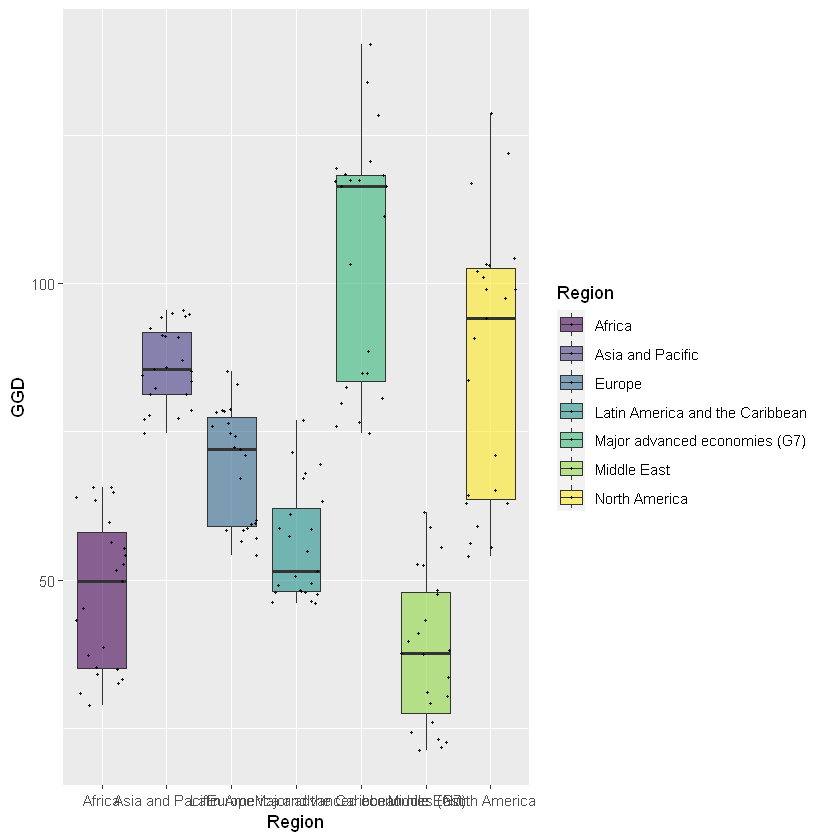

In [8]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Plot
  ggplot(df_select, aes(x=Region, y=GGD, fill=Region)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9)

In [6]:
#After replacement, check again to see the existence of the missing data

#df_test <- read.csv("weo_092423_test.csv")
#df_select_test <- df_test %>% 
#            filter(Year %in% 2000:2022) 
#nrow(df_select_test)
missing_rows_test <- df_select[apply(is.na(df_select), 1, any), ]
missing_rows_test

Region,Year,ACCT,GDP,GGD,INF,PPL
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


# Color - plz refer to color.ipynb file for details

In [137]:
#colors()
#hexcode: https://htmlcolorcodes.com/
#hexcode: https://htmlcolorcodes.com/color-chart/

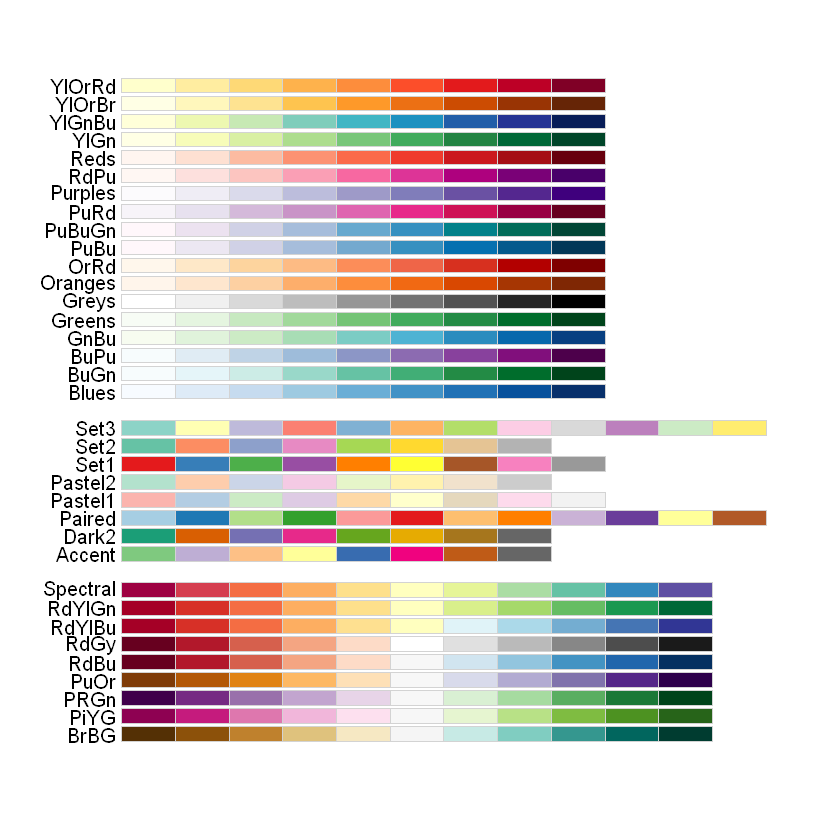

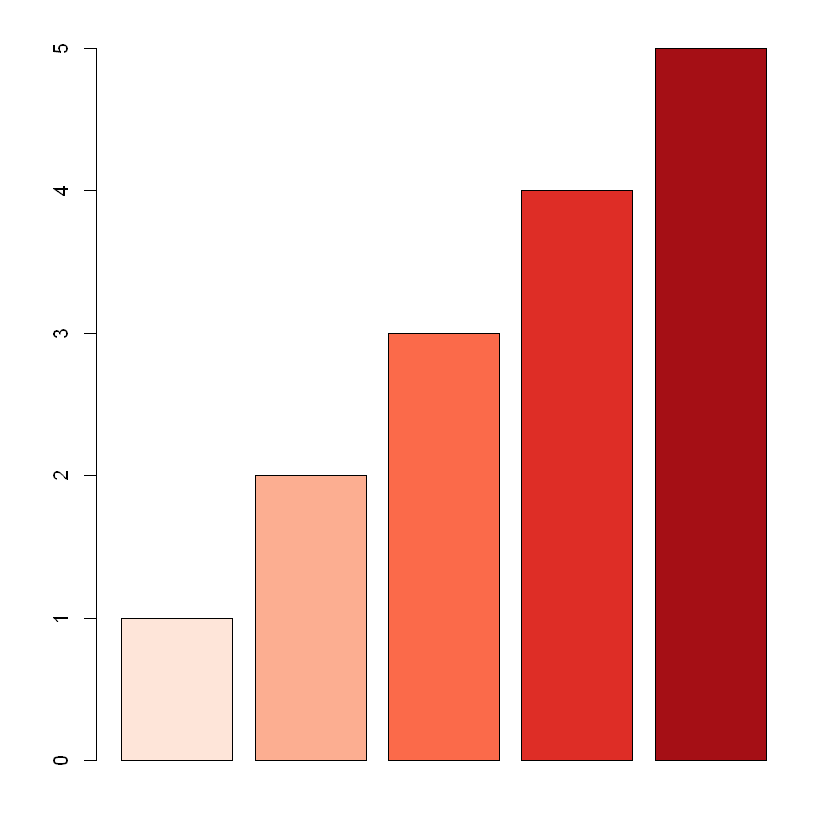

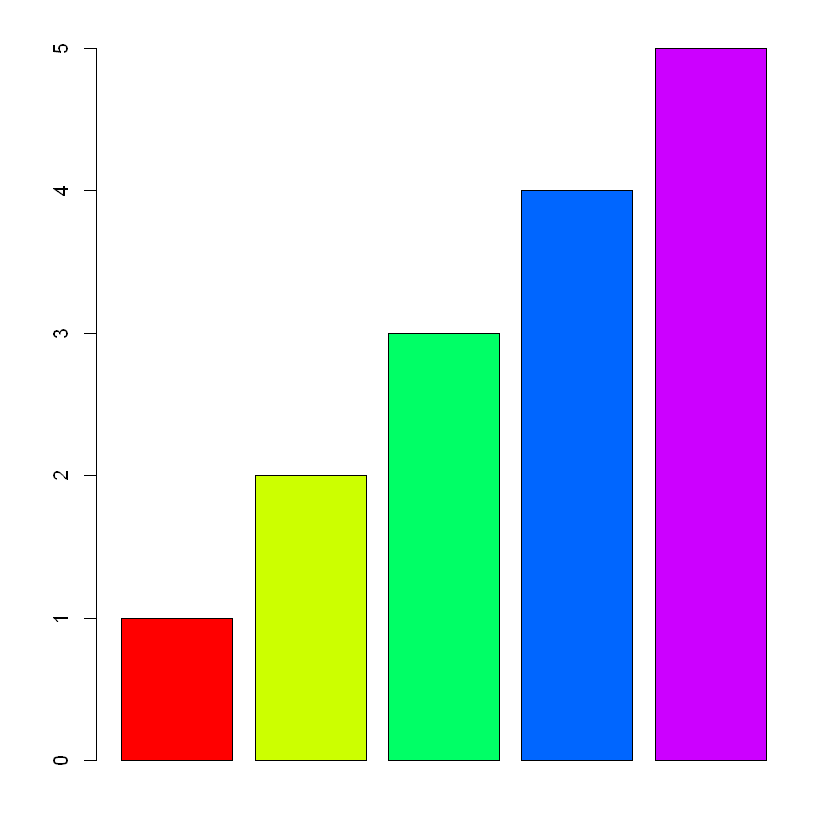

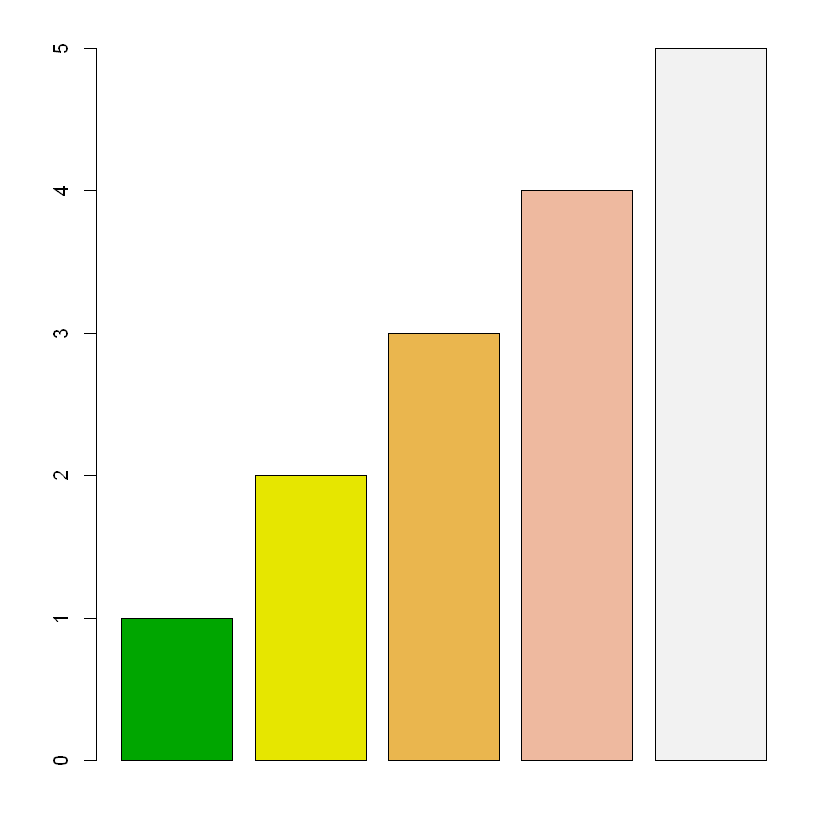

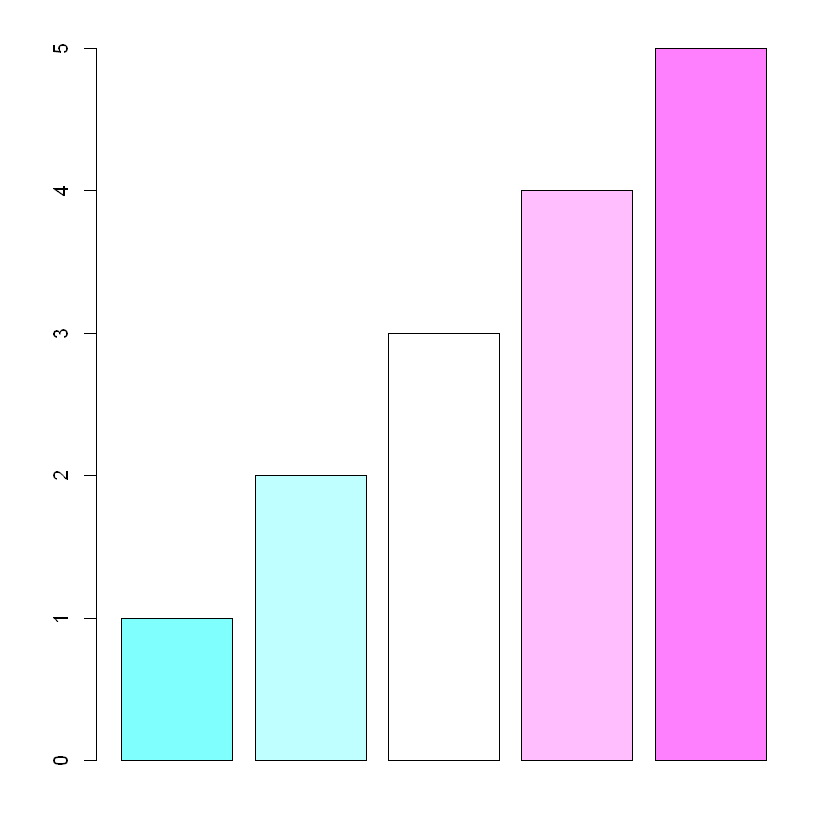

In [140]:
"""
library(RColorBrewer)
par(mar=c(3,4,2,2))
display.brewer.all()
barplot(1:5, col=brewer.pal(5, name = 'Reds'))

# Use rainbow colors
barplot(1:5, col=rainbow(5))

# Use heat.colors
#barplot(1:5, col=heat.colors(5))

# Use terrain.colors
barplot(1:5, col=terrain.colors(5))

# Use topo.colors
#barplot(1:5, col=topo.colors(5))

# Use cm.colors
barplot(1:5, col=cm.colors(5))
"""

# Boxplot - use df_select onward

In [10]:
#EXECUTE EACH TIME !!!

# Modify Region values as they are too long/crowded in the graph
# Assuming 'df' is your data frame and 'Region' is the column you want to modify

df_select$Region <- gsub("Asia and Pacific", "APAC", df_select$Region)
df_select$Region <- gsub("Latin America and the Caribbean", "LATAM", df_select$Region)
df_select$Region <- gsub("Major advanced economies \\(G7\\)", "G7", df_select$Region)
df_select$Region <- gsub("North America", "NAM", df_select$Region)
df_select$Region <- gsub("Middle East", "ME", df_select$Region)
colnames(df_select)

[1] "Region" "Year"   "ACCT"   "GDP"    "GGD"    "INF"    "PPL"

In [269]:
#help(jpeg)

### Complete boxplot

In [277]:
#https://r-graph-gallery.com/89-box-and-scatter-plot-with-ggplot2.html

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# create a dataset
#data <- data.frame(
#  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
#  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
#)

###pdf(file = "ggd.pdf", bg="white") # pdf is not working at all!!

#png(file = "ggd.png", bg = "white")  # save file size. If desired, width = 1000, height = 1000)

jpeg(filename = "ggd.jpg",  bg = "white") # needs to end with dev.off()


# Plot
#df_select %>%
  ggplot(df_select, aes(x=Region, y=GGD, fill=Region)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +   
    #scale_size_area() +   
    theme(
      legend.position="right",
      plot.title = element_text(hjust = 0.5, vjust=3),
      axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), #without this step, the layout is nice too and default
      axis.title.y = element_text(hjust=0.5, vjust=10, color = "blue", size = 14, face = "bold")  #hjust b/t 0 and 1; vjust for vertical alignment
    ) +
    ggtitle("A boxplot with jitter") +
    xlab("Region")+
    ylab("General Government Gross Debt (% of GDP) ")
dev.off()



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

png 
  2

── Attaching core tidyverse packages ───────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ purrr     1.0.1
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
W

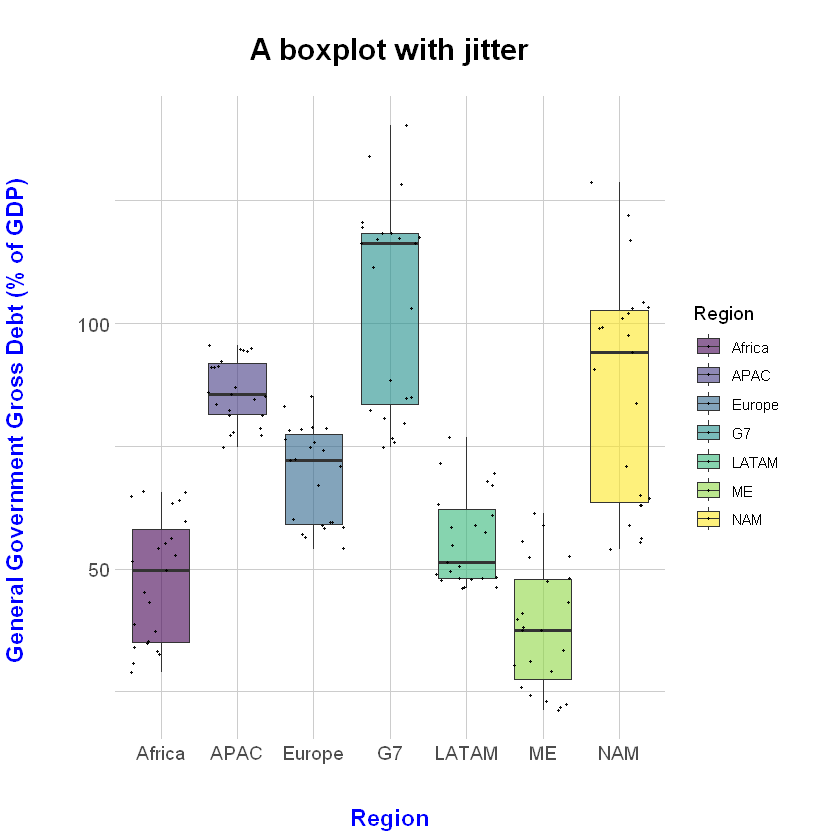

In [8]:
#https://r-graph-gallery.com/89-box-and-scatter-plot-with-ggplot2.html

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Plot
  ggplot(df_select, aes(x=Region, y=GGD, fill=Region)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +   
    #scale_size_area() +   
    theme(
      legend.position="right",
      plot.title = element_text(hjust = 0.5, vjust=3),
      axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), #without this step, the layout is nice too and default
      axis.title.y = element_text(hjust=0.5, vjust=10, color = "blue", size = 14, face = "bold")  #hjust b/t 0 and 1; vjust for vertical alignment
    ) +
    ggtitle("A boxplot with jitter") +
    xlab("Region")+
    ylab("General Government Gross Debt (% of GDP) ")



## A loop to generate multiple plots at once

In [11]:
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Define the variables for which you want to create plots
variables <- c("ACCT", "GDP", "GGD", "INF", "PPL")

# Use a loop to create a plot for each variable
for (var in variables) {
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=var, fill="Region")) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9)
  
  # Print the plot
  #print(p)

  # Save the plot
  ggsave(paste0(var, "_plot.png"), plot = p)

}



Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


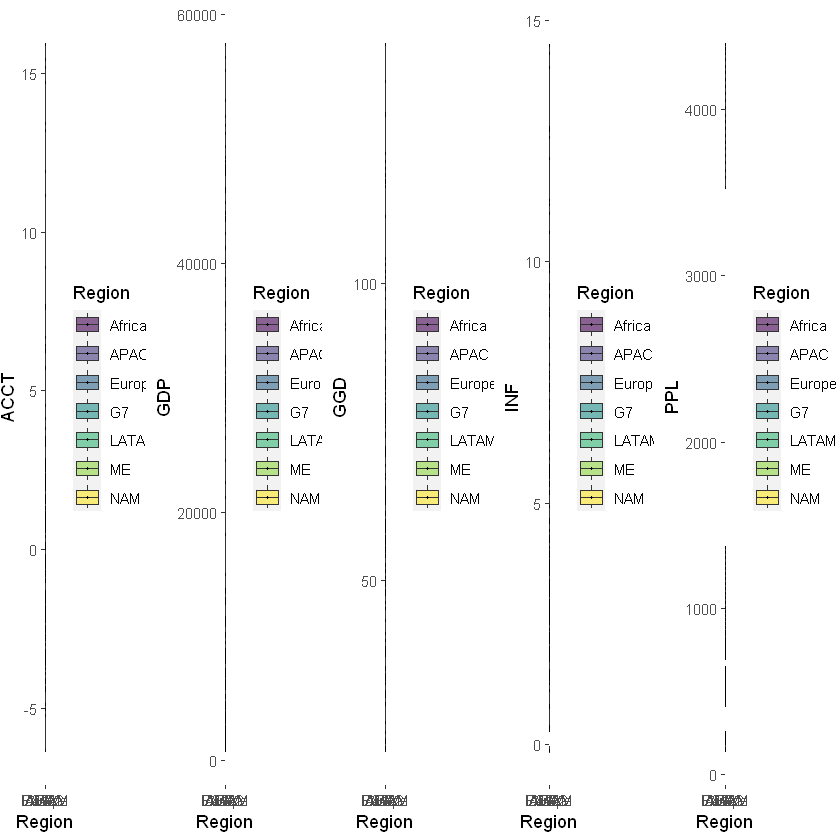

In [30]:
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(gridExtra)

# Define the variables for which you want to create plots
variables <- c("ACCT", "GDP", "GGD", "INF", "PPL")

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (var in variables) {
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=var, fill="Region")) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9)
  
  # Add the plot to the list
  plot_list[[var]] <- p
}

# Arrange the plots in one row
combined_plot <- do.call(gridExtra::grid.arrange, c(plot_list, ncol=length(plot_list)))

# Export the combined plot
#ggsave("combined_plot.png", combined_plot)

# Export the combined plot with specified dimensions
# these dimensions are in inches and will determine the size of the saved image, not the proportions of the plot itself. 
# The proportions of each individual plot are determined by the plotting area available in each panel and the aspect ratio of the data.
ggsave("combined_plot.png", combined_plot, width = 30, height = 10)


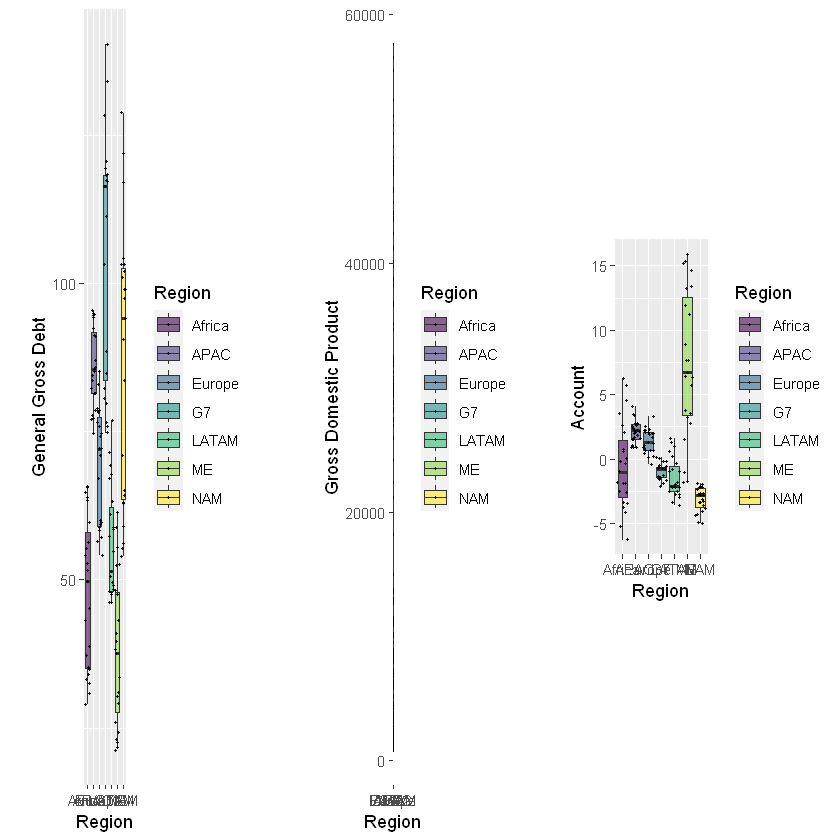

In [19]:
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(gridExtra)

# Define the variables for which you want to create plots
variables <- c("GGD", "GDP", "ACCT")
variables_ylab <- c("General Gross Debt (% of GDP) ", "Gross Domestic Product", 
                    "Current Account Balance (% of GDP)")

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (i in seq_along(variables)) {
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=variables[i], fill="Region")) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #coord_fixed(ratio = 1) +  # Adjust this ratio as needed
    ylab(variables_ylab[i])  # Add y-axis label
  
  # Add the plot to the list
  plot_list[[variables[i]]] <- p
}

# Arrange the plots in one row
combined_plot <- do.call(gridExtra::grid.arrange, c(plot_list, ncol=length(plot_list)))

# Export the combined plot with specified dimensions
ggsave("combined_plot.png", combined_plot, width = 10, height = 10)


In [20]:
install.packages("ggpubr")

Installing package into 'C:/Users/truev/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'ggrepel', 'ggsci', 'ggsignif', 'polynom', 'rstatix'




package 'ggrepel' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'ggsignif' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'rstatix' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\truev\AppData\Local\Temp\Rtmp2Hdz0k\downloaded_packages


In [31]:
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(ggpubr)

# Define the variables for which you want to create plots
variables <- c("GGD", "GDP", "ACCT")
variables_ylab <- c("General Gross Debt", "Gross Domestic Product", "Account")

# Initialize an empty list to store the plots
plot_list <- list()

# Use a loop to create a plot for each variable
for (i in seq_along(variables)) {
  # Create the plot
  p <- ggplot(df_select, aes_string(x="Region", y=variables[i], fill="Region")) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #coord_fixed(ratio = 1) +  # Adjust this ratio as needed
    ylab(variables_ylab[i])  # Add y-axis label
  
  # Add the plot to the list
  plot_list[[variables[i]]] <- p
}

# Arrange the plots in one row
combined_plot <- ggarrange(plotlist = plot_list, ncol = length(plot_list), align = "v")

# Export the combined plot with specified dimensions
ggsave("combined_plot.png", combined_plot, width = 30, height = 10)


In [270]:
#help(summarize)

In [271]:
#help(mutate)

In [41]:
"""
starwars %>%
  select(name, mass, species) %>%
  mutate(mass_norm = mass / mean(mass, na.rm = TRUE))

starwars %>%
  select(name, mass, species) %>%
  group_by(species) %b>%
  mutate(mass_norm = mass / mean(mass, na.rm = TRUE))
"""

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
9:   mutate(mass_norm = mass / mean(mass, na.rm = TRUE))
10: "
      ^


Joining with `by = join_by(name)`
Warning message:
"`position_dodge()` requires non-overlapping x intervals"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found 

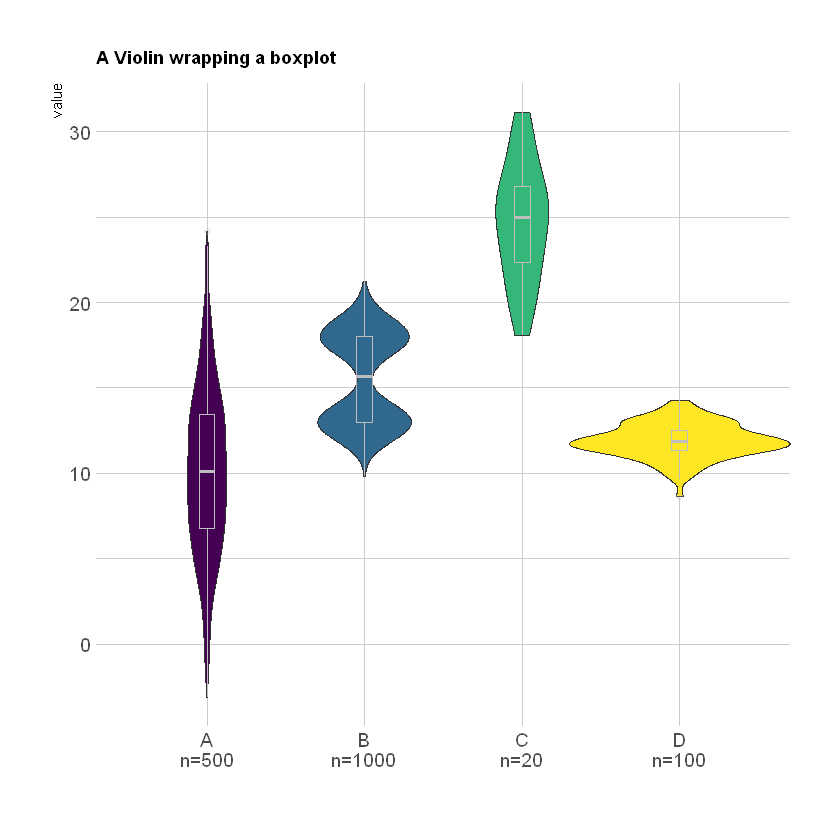

In [46]:
# Libraries
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# sample size
sample_size = data %>% group_by(name) %>% summarize(num=n())

# Plot
data %>%
  left_join(sample_size) %>%
  mutate(myaxis = paste0(name, "\n", "n=", num)) %>%
  ggplot( aes(x=myaxis, y=value, fill=name)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    scale_fill_viridis(discrete = TRUE) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("")



# Complete Violin plot

In [2]:

#https://r-graph-gallery.com/violin_and_boxplot_ggplot2.html

# Libraries
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)

#jpeg("ggd_violin.jpg", bg="white")

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# sample size
sample_size = data %>% group_by(name) %>% summarize(num=n())
#sample_size

# Plot
#data %>%
#  left_join(sample_size) %>%
#  mutate(myaxis = paste0(name, "\n", "n=", num)) %>%
#  ggplot( aes(x=myaxis, y=value, fill=name)) +
  ggplot(df_select, aes(x=Region, y=GGD, fill=Region)) +
    geom_violin(width=1.4) +
    geom_boxplot(width=0.1, color="grey", alpha=0.2) +
    #scale_fill_viridis(discrete = TRUE) +
    scale_color_brewer(palette = "Paired")+
    theme_ipsum() +
    theme(
      legend.position="right",
      legend.title= element_text(size = 14, face = "bold"),
      legend.text=element_text(size=10, face = "bold"),
      plot.title = element_text(hjust = 0.5, vjust=3),
      axis.title.x = element_text(hjust=0.5, vjust=-7,color = "blue", size = 14, face = "bold"), #without this step, the layout is nice too and default
      axis.title.y = element_text(hjust=0.5, vjust=10, color = "blue", size = 14, face = "bold")  #hjust b/t 0 and 1; vjust for vertical alignment   
    ) +
    ggtitle("A Violin wrapping a boxplot") +
    xlab("Region")+
    ylab("General Government Gross Debt (% of GDP) ")

#dev.off()


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: viridisLite



ERROR: Error in eval(expr, envir, enclos): object 'df_select' not found


# Scatterplot

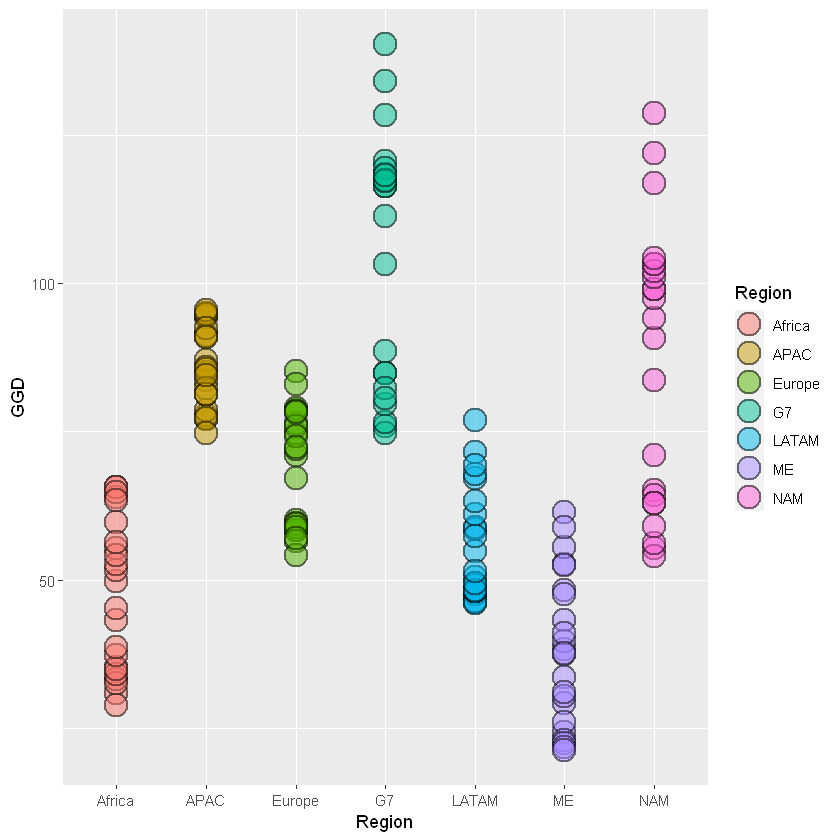

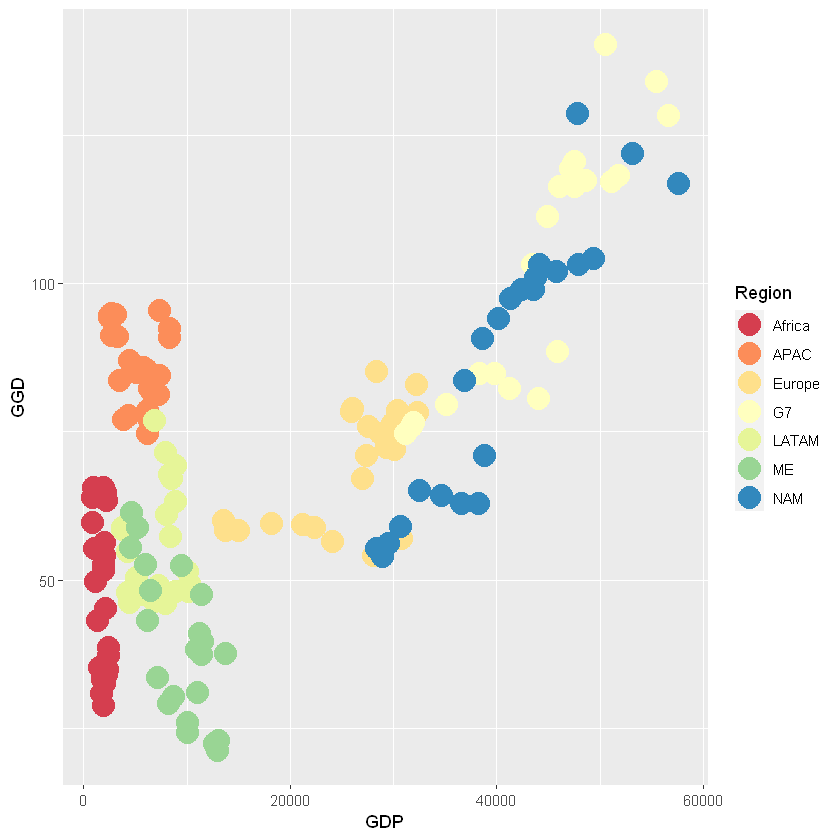

In [78]:
#https://cran.r-project.org/web/packages/hrbrthemes/vignettes/why_hrbrthemes.html
#https://r-graph-gallery.com/273-custom-your-scatterplot-ggplot2.html

# library
library(ggplot2)
library(RColorBrewer)

# Iris dataset is natively provided by R
#head(iris)
 
# use options!
ggplot(df_select, aes(x=Region, y=GGD, fill=Region)) + 
    geom_point(
        #color="orange",
        #fill="#69b3a2",
        shape=21,
        alpha=0.5,
        size=6,
        stroke = 1
        )
   
# library
library(ggplot2)
library(hrbrthemes)

# Iris dataset is natively provided by R
#head(iris)
 
# use options!
p1 <- ggplot(df_select, aes(x=GDP, y=GGD, color=Region)) + 
    geom_point(
        #color="orange",
        #fill="#69b3a2",
        #shape=21,
        #alpha=0.5,
        size=6,
        #stroke = 1
        ) 

p1 + scale_color_brewer(palette = "Spectral")
   
    #theme_ipsum()+ 
    #scale_color_hue(h = c(180, 300))


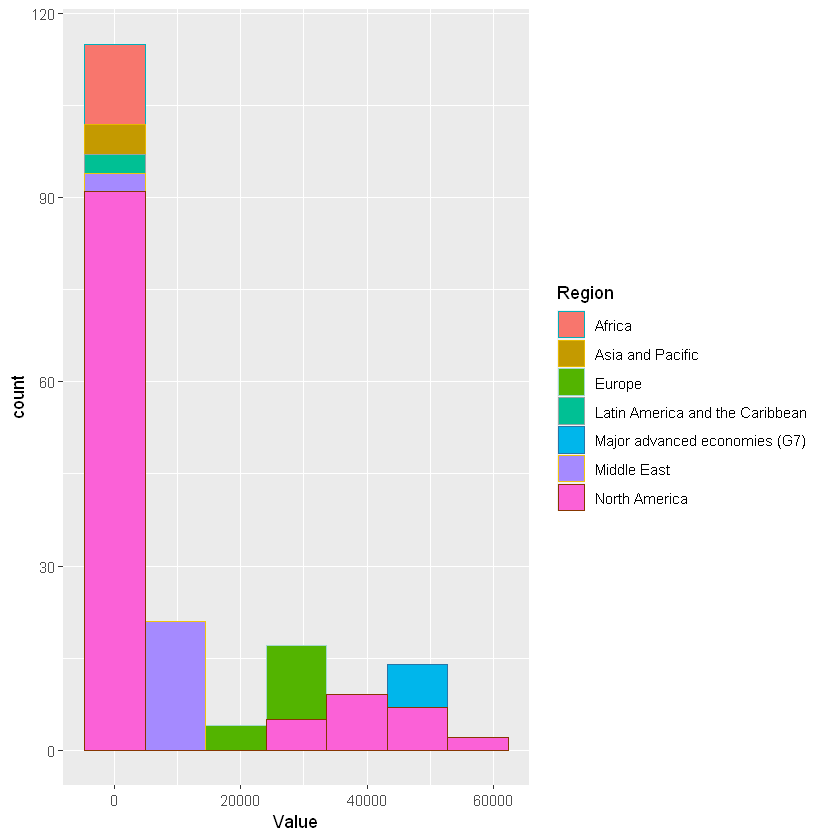

In [135]:
#hist(df1$Value)
library(wesanderson)
library(RColorBrewer)
library(ggplot2)
# Change line color by sex
#jBrew<- brewer.pal(n = 7, name = 'RdBu')

ggplot(df1, aes(x = Value)) +
  geom_histogram(aes(color = Region, fill = Region), 
                position = "identity", bins = 7)+
                scale_color_manual(values = c("#00AFBB", "#E7B800","#a2d9ce"
                         ,"#95a5a6", "#2874a6","#f1c40f","#873600")) 
                                
                #scale_color_manual(values = brewer.pal(n=7, name="RdBu")))


 #+ scale_color_manual(values = c("#00AFBB", "#E7B800",")) 


# change fill and outline color manually 
#ggplot(wdata, aes(x = weight)) +
#  geom_histogram(aes(color = sex, fill = sex), 
#                position = "identity", bins = 30, alpha = 0.4) +
#  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
#  scale_fill_manual(values = c("#00AFBB", "#E7B800"))